# Effective Radius and Intensity ($r_e$  and $I_{e}$)

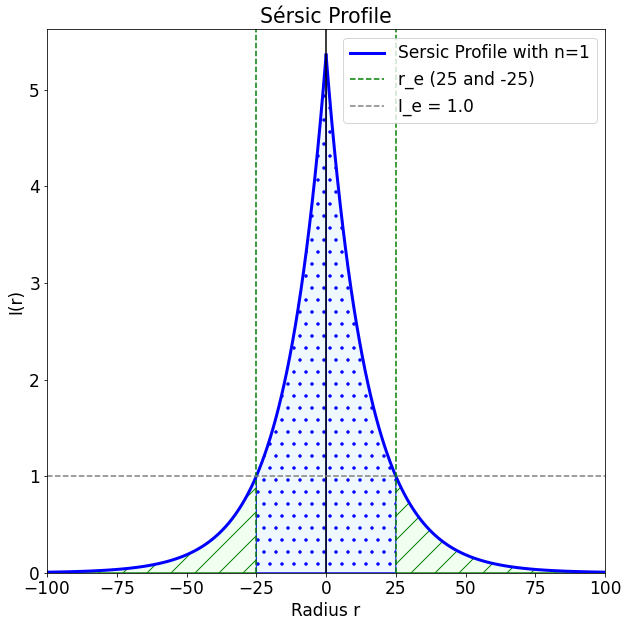

In [18]:
import numpy as np 
from astropy.modeling import models 

%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'
plt.rcParams.update({'font.size': 17})

r_eff=25
n = 1 
model = models.Sersic1D(r_eff=r_eff, n=n)

r_list = np.arange(0, 101, 1)


plt.plot(r_list, model(r_list), c='b', linewidth=3, label="Sersic Profile with n={}".format(n))
plt.plot(-r_list, model(r_list), c='b', linewidth=3)


plt.fill_between(r_list,model(r_list), color='honeydew', hatch='/', edgecolor='green')
plt.fill_between(-r_list,model(r_list), color='honeydew', hatch='/', edgecolor='green')

r_eff_list = np.arange(0, r_eff+1, 1)
plt.fill_between(r_eff_list,model(r_eff_list), color='aliceblue', hatch='.', edgecolor='blue')
plt.fill_between(-r_eff_list,model(r_eff_list), color='aliceblue', hatch='.', edgecolor='blue')


plt.axvline(r_eff, c='green', label='r_e ({} and -{})'.format(r_eff, r_eff), linestyle='--')
plt.axvline(-r_eff, c='green', linestyle='--')
plt.axvline(c='black')

plt.axhline(1, c='gray', linestyle='--', label='I_e = {}'.format(model.amplitude.value))


plt.title("Sérsic Profile")
plt.xlabel("Radius r")
plt.ylabel("I(r)")
plt.legend()
plt.ylim(0, None)
plt.xlim(-100, 100)

plt.savefig("sersic_radii.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)
plt.show()



# Curve of Growth

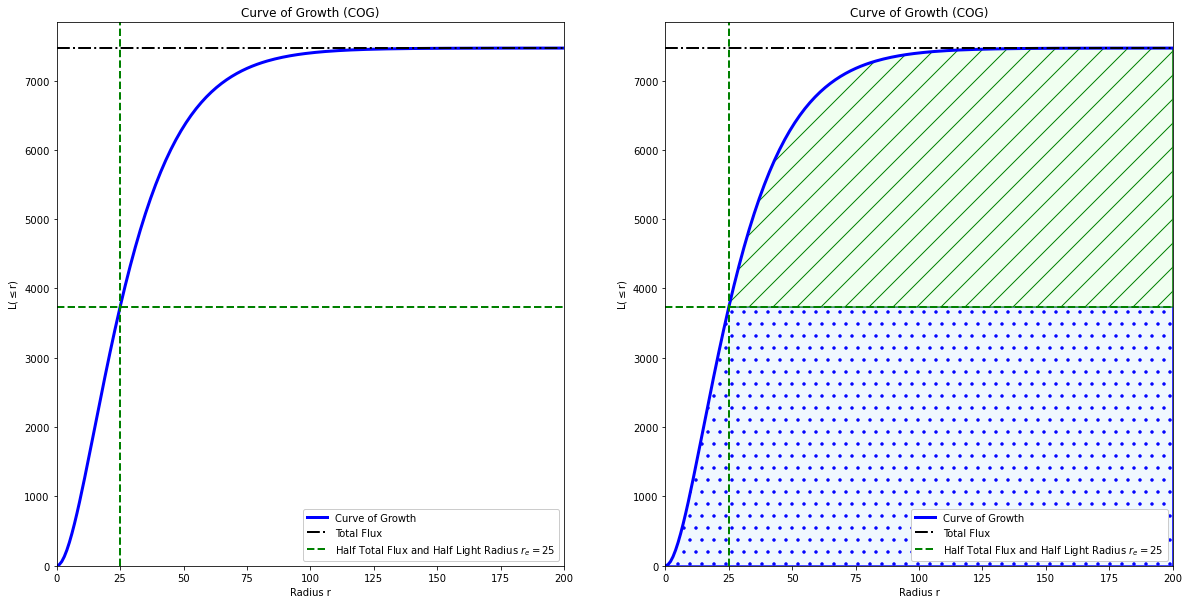

In [13]:
import numpy as np 
from petrofit.models import sersic_enclosed, sersic_enclosed_inv


%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
total_flux = sersic_enclosed(np.inf, amplitude, r_eff, n)

f, ax = plt.subplots(1,2, figsize=[20,10])
for i in range(2):
    plt.sca(ax[i])
    plt.plot(r_list, flux_list, c='Blue', linewidth=3, label='Curve of Growth')

    plt.axhline(total_flux, c='black', linestyle='-.', linewidth=2, label='Total Flux')
    plt.axhline(total_flux/2, c='green', linestyle='--', linewidth=2,)

    plt.axvline(r_eff, c='green', linestyle='--', linewidth=2, label='Half Total Flux and Half Light Radius $r_e = {}$'.format(r_eff))

    eff = flux_list.copy()
    eff[r_eff:] = total_flux/2
    
    if i == 1:
        plt.fill_between(r_list, eff, color='aliceblue', hatch='.', edgecolor='blue')
        plt.fill_between(r_list, flux_list, eff, color='honeydew', hatch='/', edgecolor='green')


    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh._legmarker.set_alpha(1)
        lh.set_alpha(1)

    plt.title("Curve of Growth (COG)")
    plt.xlabel("Radius r")
    plt.ylabel("L($\leq$r)")
    legend = plt.legend()
    legend.get_frame().set_alpha(None)
    plt.ylim(0, None)
    plt.xlim(0, max(r_list))



plt.savefig("sersic_cog.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)
plt.show()

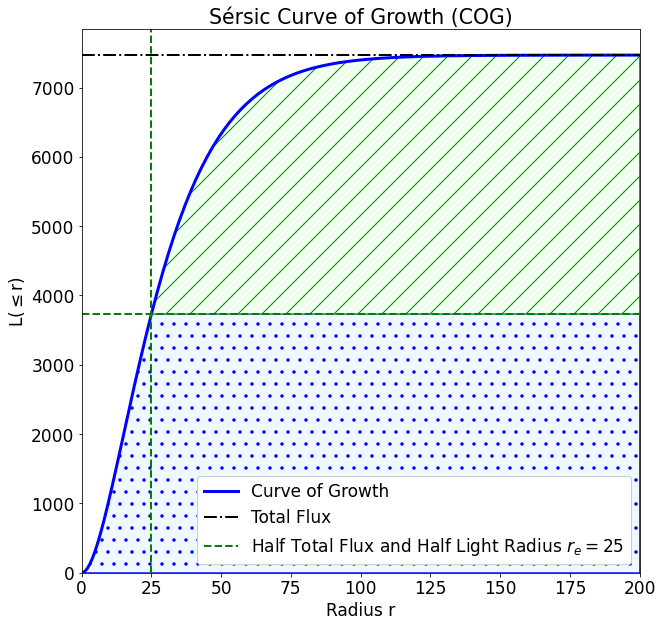

In [17]:
import numpy as np 
from petrofit.models import sersic_enclosed, sersic_enclosed_inv


%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'
plt.rcParams.update({'font.size': 17})

r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
total_flux = sersic_enclosed(np.inf, amplitude, r_eff, n)

i = 1
plt.plot(r_list, flux_list, c='Blue', linewidth=3, label='Curve of Growth')

plt.axhline(total_flux, c='black', linestyle='-.', linewidth=2, label='Total Flux')
plt.axhline(total_flux/2, c='green', linestyle='--', linewidth=2,)

plt.axvline(r_eff, c='green', linestyle='--', linewidth=2, label='Half Total Flux and Half Light Radius $r_e = {}$'.format(r_eff))

eff = flux_list.copy()
eff[r_eff:] = total_flux/2

if i == 1:
    plt.fill_between(r_list, eff, color='aliceblue', hatch='.', edgecolor='blue')
    plt.fill_between(r_list, flux_list, eff, color='honeydew', hatch='/', edgecolor='green')


leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)
    lh.set_alpha(1)

plt.title("Sérsic Curve of Growth (COG)")
plt.xlabel("Radius r")
plt.ylabel("L($\leq$r)")
legend = plt.legend()
legend.get_frame().set_alpha(None)
plt.ylim(0, None)
plt.xlim(0, max(r_list))



plt.savefig("sersic_single_cog.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Sersic Index ($n$)

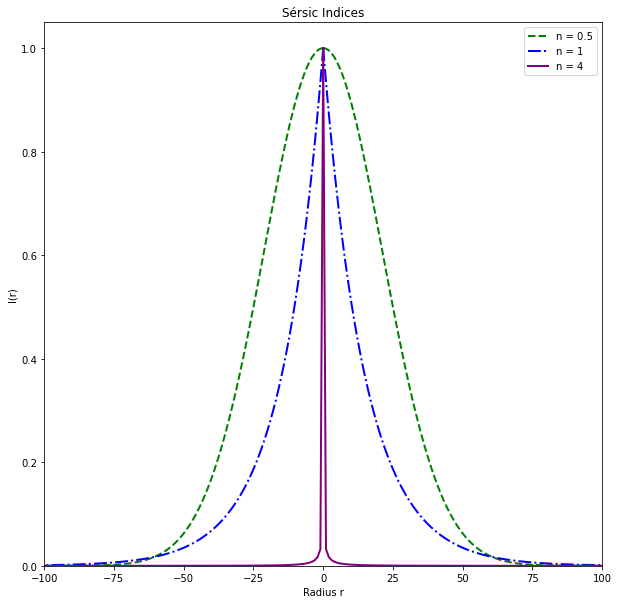

In [5]:
import numpy as np 
from astropy.modeling import models 
from scipy.special import gammaincinv


%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

r_eff=25
n = 1 


r_list = np.arange(0, 101, 1)


for line_style, c, n in zip(['--','dashdot','-'], ['g', 'b', 'purple'],[0.5, 1, 4]):
    
    b_n = gammaincinv(2. * n, 0.5)
    model = models.Sersic1D(amplitude=1/np.exp(b_n),  r_eff=r_eff, n=n)
    
    plt.plot(r_list, model(r_list), c=c, linewidth=2, label="n = {}".format(n), linestyle=line_style)
    plt.plot(-r_list, model(r_list), c=c, linewidth=2, linestyle=line_style)


plt.title("Sérsic Indices")
plt.xlabel("Radius r")
plt.ylabel("I(r)")
plt.legend()
plt.ylim(0, None)
plt.xlim(-100, 100)

plt.savefig("sersic_index.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)
plt.show()


# Petrosian Profiles 

/home/robel/temp/petrofit/petrofit/models.py:282: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(-x) * x ** (2 * n)) / (2 * n * g)


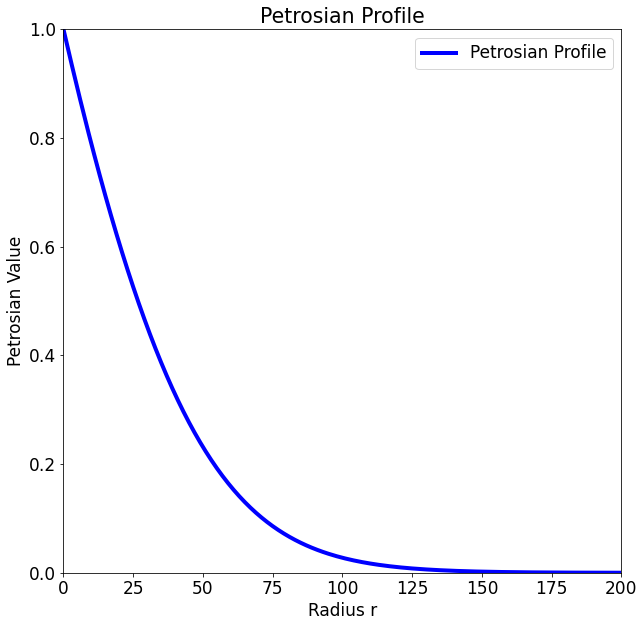

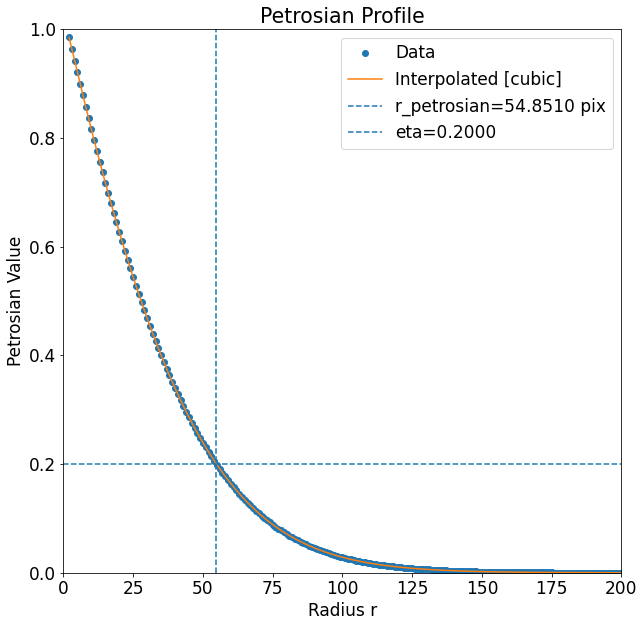

In [20]:
import numpy as np 
from petrofit.models import petrosian_profile, sersic_enclosed
from petrofit.petrosian import Petrosian


%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'
plt.rcParams.update({'font.size': 17})

r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

petro_list = petrosian_profile(r_list, r_eff, n)
petro_list[0] = 1

plt.plot(r_list, petro_list, color="b", linewidth=4, label='Petrosian Profile')


plt.title("Petrosian Profile")
plt.xlabel("Radius r")
plt.ylabel("Petrosian Value")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max(r_list))


plt.savefig("sersic_petrosian.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)


plt.show()
flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
area_list = np.pi * r_list**2 

p = Petrosian(r_list[1:], area_list[1:], flux_list[1:],)

p.plot()

plt.title("Petrosian Profile")
plt.xlabel("Radius r")
plt.ylabel("Petrosian Value")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max(r_list))

plt.savefig("sersic_petrosian_eta.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)



# Petrosian Corrections 

In [ ]:
import numpy as np 
from petrofit.petrosian import PetrosianCorrection
from astropy.modeling import models, fitting

%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

pc = PetrosianCorrection("../data/concentration_index_grid_no_psf.yaml")

keyx = 'c_index'
keyy = 'epsilon'

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

#plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# initialize a linear fitter
fit = fitting.LinearLSQFitter()
#fit = fitting.LevMarLSQFitter()
# initialize a linear model
line_init = models.Polynomial1D(4)
#line_init = models.Exponential1D() + models.Const1D()
fitted_line = fit(line_init, x, y)

print(fitted_line.param_names)
print(fitted_line.parameters)

arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
#line_init = models.Exponential1D() + models.Const1D()
plt.plot(arr, fitted_line(arr), c='red', label='Fitted 4th degree polynomial')
#plt.plot(arr, 0.1102*np.exp(arr/1.25))

plt.title("Relationship b/w Concentration and Epsilon")
plt.xlabel("C2080")
plt.ylabel("Epsilon")
plt.legend()

plt.savefig("concentration_index_vs_epsilon.png", dpi=70, bbox_inches = 'tight')#, pad_inches = 0)

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()

#########################################################

pc = PetrosianCorrection("../data/concentration_index_grid_f105w_60mas.yaml")

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

plt.plot(arr, fitted_line(arr), c='red', label='Fitted 4th degree polynomial (No PSF)')

plt.title("F105W Relationship b/w Concentration and Epsilon")
plt.xlabel("C2080")
plt.ylabel("Epsilon")
plt.legend()

plt.savefig("f105w_concentration_index_vs_epsilon.png", dpi=70, bbox_inches = 'tight')#, pad_inches = 0)

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()
    

In [ ]:
import numpy as np 
from petrofit.petrosian import PetrosianCorrection
from astropy.modeling import models, fitting

%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

pc = PetrosianCorrection("../data/concentration_index_grid_no_psf.yaml")

keyx = 'c_index'
keyy = 'n'

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

#plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# initialize a linear fitter
fit = fitting.LevMarLSQFitter()
# initialize a linear model
line_init = models.Exponential1D() + models.Const1D()
fitted_line = fit(line_init, x, y)

print(fitted_line.param_names)
print(fitted_line.parameters)

arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
#line_init = models.Exponential1D() + models.Const1D()
plt.plot(arr, fitted_line(arr), c='red', label='Fitted Exponential'.format(*fitted_line.parameters))
#plt.plot(arr, 0.1102*np.exp(arr/1.25))

plt.title("Relationship b/w Concentration Index and Sersic Index")
plt.xlabel("C2080")
plt.ylabel("Sersic Index n")
plt.legend()

plt.savefig("concentration_index_vs_n.png", dpi=70, bbox_inches = 'tight')#, pad_inches = 0)

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()

# multi_fit

In [ ]:
# Saved for doc notebook, no code to run see multi_object.ipynb
#plt.savefig("./images/multi_fit.png", dpi=100, bbox_inches = 'tight', pad_inches = 0)
